In [14]:
%load_ext autoreload
%autoreload 2

from PDAC_biomarkers.file_utils import read_csv
from PDAC_biomarkers.data_utiils import to_binary
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


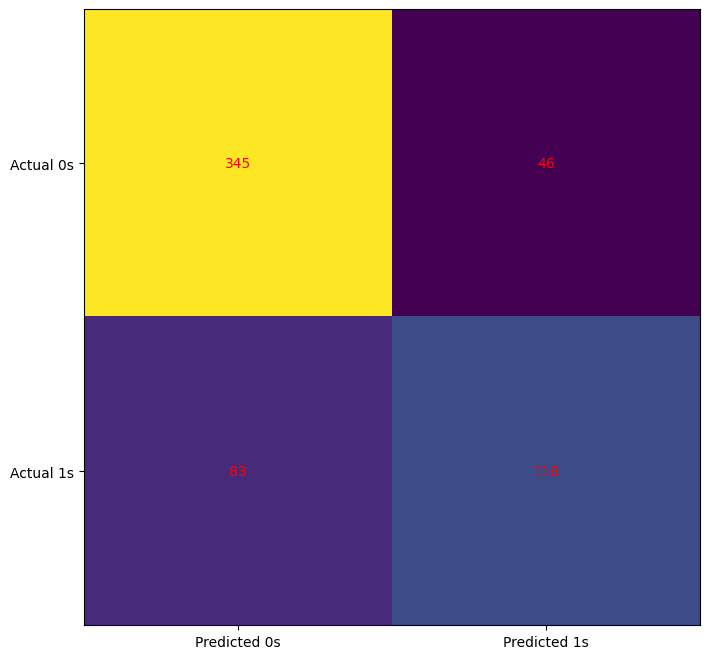

In [23]:
df = read_csv(Path(r"../data/biomarker_data.csv"))
df = to_binary(df)
df
X = df.iloc[:, 10].values.reshape(-1, 1)
Y = df.iloc[:, 5]

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X, Y)
# model.classes_
model.intercept_ # -2.10878332
model.coef_ # 0.43617525
model.score(X, Y) # 0.7813559322033898

cm = confusion_matrix(Y, model.predict(X))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()